<a href="https://colab.research.google.com/github/hughjafro/DS-Sprint-02-Storytelling-With-Data/blob/master/Chris_Tolbert_LS_DS_123_Make_explanatory_visualizations_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
# From https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/

display(example)

**This is the chart we are trying to replicate.**

1. It has a heading and subheading at the top
2. It has labeled x and y axes
3. The y axis is in increments of 10 at the ticks
4. The x axis goes from 1 to 10 by 1's
5. Color picker gives hex #EC713B

**Needed**
1. Rating system is 1-10 isolate those numbers/percents
2. How will I index for percent of total votes

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake =pd.Series([38,3,2,1,2,4,6,5,5,33],
                index=range(1,11))

In [0]:
# there are a variety of styles in matplotlib
# plt.style.available
plt.style.use('fivethirtyeight')

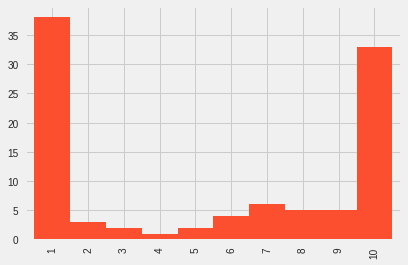

In [5]:
#fake.plot.bar();
fake.plot.bar(color='C1', width=1);
# can change width to 0.8 etc

In [0]:
# Can change hex color by color='#XXXXXX'

In [13]:
display(example)

In [0]:
# Waht other data would be used for histagram
# Instead of all individual votes and made a hist of that info (rows in table - one row for each vote/rating)
fake2 = pd.Series([1,1,1,1,1,1,1,1,1,1,1,1,1,
                  2,2,2,
                  3,3,3,
                  4,4,
                  5,5,5,
                  6,6,6,6,
                  7,7,7,7,7,
                  8,8,8,8,
                  9,9,9,9,
                  10,10,10,10,10,10,10,10,10,10,10])

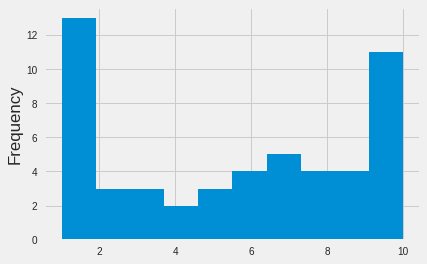

In [16]:
fake2.plot.hist();
 

In [7]:
# how to make look like other data ---- maybe use value_counts
fake2.value_counts().sort_index()

1     13
2      3
3      3
4      2
5      3
6      4
7      5
8      4
9      4
10    11
dtype: int64

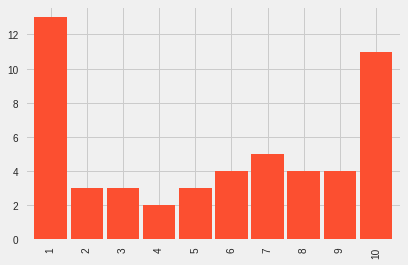

In [8]:
# Then pass thru bar chart
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

In [27]:
display(example)

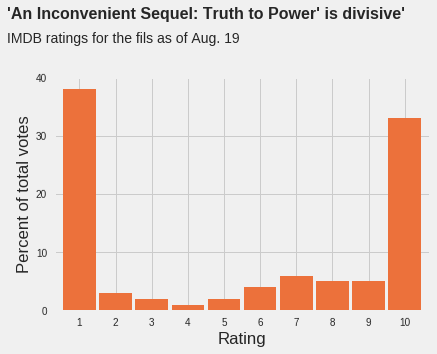

In [9]:
# This template code that we will use later to format our true data

plt.style.use('fivethirtyeight')

fake =pd.Series([38,3,2,1,2,4,6,5,5,33],
                index=range(1,11))

#fake.plot.bar(color='#EC713B', width=0.9)

ax = fake.plot.bar(color='#EC713B', width=0.9) # this allows you to use this ax(is) object to rotate/manipulate etc

#ax.set(title="'An Inconvenient Sequel: Truth to Power' is divisive",
      #xlabel='Rating',
      #ylabel='Percent of total votes')

ax.set(xlabel='Rating',
       ylabel='Percent of total votes',
       yticks=range(0,50,10))

# Can play with the placement of the title in this case
ax.text(x=-2,y=50, s="'An Inconvenient Sequel: Truth to Power' is divisive'",
       fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s="IMDB ratings for the fils as of Aug. 19")


ax.tick_params(labelrotation=1) # method

# ValueError: keyword fontsize is not recognized; valid keywords are 
#['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor',
# 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length',
# 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom',
# 'labelright', 'labeltop', 'labelrotation']


In [0]:
# How will we load this info into a dataframe

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [59]:
df.shape

(80053, 27)

In [60]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Get more columns than given
pd.options.display.max_columns = None

# Transpose rows/columns labels to easily see column names - only 27 vs 80k
df.sample(5).T #transpose

In [15]:
# Becasue we want to check out totals we should look at the last timestamp totals

# Try to understand what timestamp is ?????
df.timestamp.describe()

# Output, freq, just shows that they are all unique

count                          80053
unique                         80053
top       2017-08-03 16:30:02.769994
freq                               1
Name: timestamp, dtype: object

In [0]:
# change timestamp to proper datatime format
df.timestamp = pd.to_datetime(df.timestamp)

# I guess it will format it so the date and times are separate
# These are things that you can only know by seeing it done to know the right format

In [68]:
df.timestamp.describe()
# Can see it matches with https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
# What is the index -- check .head and see they are integers
# We want to index it using timestamp since we care about when totals are done

df.set_index('timestamp', inplace=True)

In [70]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [75]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [77]:
# Is this data for just this movie or another one - check categories
df.category.value_counts()

Aged 18-29            4216
Males                 4216
Non-US users          4216
Females Aged 18-29    4216
Males under 18        4216
Females Aged 45+      4216
Aged 45+              4216
Males Aged 45+        4216
IMDb users            4216
US users              4216
Males Aged 18-29      4216
Females Aged 30-44    4216
IMDb staff            4216
Males Aged 30-44      4216
Aged 30-44            4216
Top 1000 voters       4216
Aged under 18         4216
Females               4216
Females under 18      4165
Name: category, dtype: int64

In [80]:
# Check links and appears to be jsut for this movie
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-age_4            4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-international    4216
http://www.imdb.com/title/tt6322922/ratings-age_2            4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-male_age_4       4216
http://www.imdb.com/title/tt6322922/ratings-usa              4216
http://www.imdb.com/title/tt6322922/ratings-male_age_1       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www.imdb.com/title/tt6322922/ratings-female           4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings-age_1            4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-female_age_2     4216
http://www

In [82]:
# Can filter by column
df[df.category=='IMDb users']

# When category is imdb users it just shows ratings, see link url ending

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [83]:
# Bool indexing filter all with falses and only show trues
df.category=='IMDb users'

timestamp
2017-07-17 12:28:32.785639    False
2017-07-17 12:28:33.025600    False
2017-07-17 12:28:33.273919    False
2017-07-17 12:28:33.495325    False
2017-07-17 12:28:33.722849    False
2017-07-17 12:28:33.970009    False
2017-07-17 12:28:34.199847    False
2017-07-17 12:28:34.381001    False
2017-07-17 12:28:34.590224    False
2017-07-17 12:28:34.807101    False
2017-07-17 12:28:35.055251    False
2017-07-17 12:28:35.326192    False
2017-07-17 12:28:35.610367    False
2017-07-17 12:28:35.837364    False
2017-07-17 12:28:36.023600    False
2017-07-17 12:28:36.286318    False
2017-07-17 12:28:36.493883    False
2017-07-17 12:28:36.697246     True
2017-07-17 12:34:17.770310    False
2017-07-17 12:34:17.963319    False
2017-07-17 12:34:18.189098    False
2017-07-17 12:34:18.378583    False
2017-07-17 12:34:18.596179    False
2017-07-17 12:34:18.818522    False
2017-07-17 12:34:19.004680    False
2017-07-17 12:34:19.225794    False
2017-07-17 12:34:19.408369    False
2017-07-17 12:34:1

In [0]:
# Maybe jsut take the last time stamp and see where the vote count was at that timestamp
# Was the count always going up, cum, or just votes at that time
# Lets investigate
lastday = df['2017-08-29']

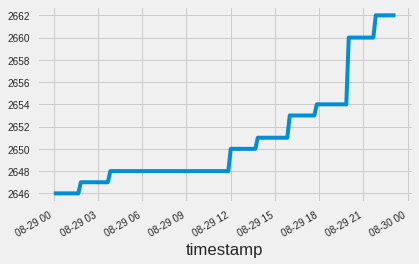

In [90]:
lastday[lastday.category=='IMDb users'].respondents.plot();
#Shows that votes are increasing, ie cumulative


In [91]:
# So we can take the sum at last tiemstamp
df.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# The above code, shows that there are 80k diff users
# We want the last timestamp data
final = df.tail(1)

In [25]:
# columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
#           '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

# Code from Quinn
# This says the columns we want are 1 to 10. Use 11 bcs its open ended
columns = ['{}_pct'.format(k) for k in range(1,11)]
final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Assign this last bit to a variable so we can call methods on it easier
data = final[columns].T

In [27]:
# Since we transposed, the 1_pct is there and we want to replace with 1-10
data.index = range(1,11)
data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


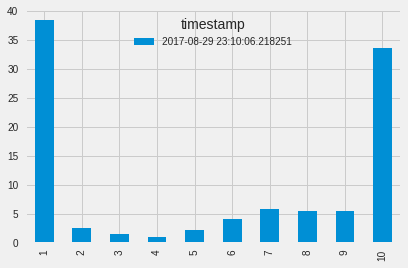

In [28]:
# Now let's see what it looks like and how far we have to go
data.plot.bar()

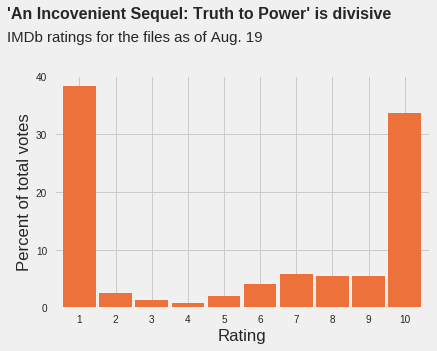

In [31]:
# Use 538 style plot

plt.style.use('fivethirtyeight')



# this allows you to use this ax(is) object to rotate/manipulate etc
ax = data.plot.bar(color='#EC713B', width=0.9, legend=False)


# Set up x/y labels and y axis range
ax.set(xlabel='Rating', 
       ylabel='Percent of total votes', 
       yticks=range(0,50,10))

# Changed placement of titles
ax.text(x=-2, y=50, s="'An Incovenient Sequel: Truth to Power' is divisive", 
       fontsize=16, fontweight='bold')

ax.text(x=-2, y=46, s="IMDb ratings for the files as of Aug. 19", fontsize=15)


ax.tick_params(labelrotation=0) # method

**Recreate any 538 charts**

My Steps


1.   Redo the example we did in class
2.   Maybe do it again


1.   Try to do charts in seaborn or bokeh - like the one above 'Women like...Men not so much' - Men dominated....
2.   Do more charts. LOTS OF CHARTS





In [0]:
# Recreate any 538 charts

